In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('wine_fraud.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [37]:
df.shape

(6497, 13)

In [38]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

In [39]:
df['quality'].value_counts()

quality
Legit    6251
Fraud     246
Name: count, dtype: int64

Above cell shows that this is unblanced label

In [40]:
df['type'].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

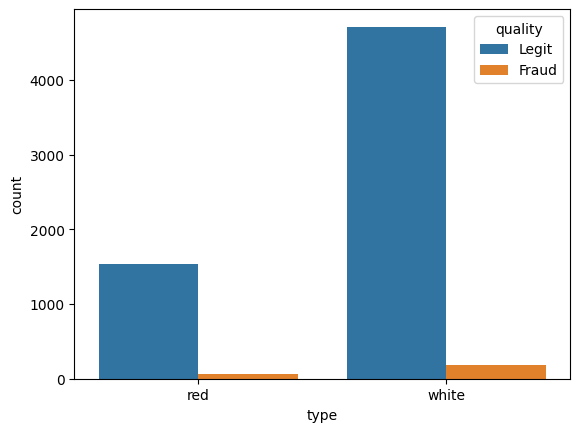

In [41]:
sns.countplot(x='type', data=df, hue='quality')

In [42]:
red = df[df['type']=='red']
white = df[df['type']=='white']

In [43]:
len(red[red['quality'] =='Fraud'])*100/len(red)

3.9399624765478425

In [44]:
len(white[white['quality'] =='Fraud'])*100/len(white)

3.736218864842793

In [45]:
df['Fraud'] = df['quality'].map({'Fraud':1, 'Legit':0})
df['Fraud'].value_counts()

Fraud
0    6251
1     246
Name: count, dtype: int64

In [46]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Fraud
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Legit,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Legit,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Legit,red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,white,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,white,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,white,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,white,0


In [47]:
df.corr(numeric_only=True)['Fraud'].sort_values()

free sulfur dioxide    -0.085204
citric acid            -0.061789
alcohol                -0.051141
residual sugar         -0.048756
total sulfur dioxide   -0.035252
sulphates              -0.034046
density                 0.016351
pH                      0.020107
fixed acidity           0.021794
chlorides               0.034499
volatile acidity        0.151228
Fraud                   1.000000
Name: Fraud, dtype: float64

# Dummy Variables

In [48]:
df['type'].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

In [49]:
# instead of True/False, we can use 1/0
pd.get_dummies(df['type'], drop_first=True, dtype=int)

,white
0,0
1,0
2,0
3,0
4,0
...,...
6492,1
6493,1
6494,1
6495,1


In [50]:
df['type'] = pd.get_dummies(df['type'], drop_first=True, dtype=int)

In [51]:
df['type'].value_counts()

type
1    4898
0    1599
Name: count, dtype: int64

In [52]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Fraud
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0,0


In [53]:
df.drop('Fraud', axis=1, inplace=True)

In [54]:
# Seperate the data into X and y
X = df.drop('quality', axis=1)
y = df['quality']

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=50)

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_X_train = sc.fit_transform(X_train)
sc_X_test = sc.transform(X_test)

In [57]:
from sklearn.svm import SVC
svc = SVC(class_weight='balanced')

In [58]:
#grid search
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,10,100,1000], 'gamma':['scale', 'auto']} #'kernel':['rbf', 'linear', 'poly', 'sigmoid']}
grid_mod = GridSearchCV(svc, param_grid)

In [59]:
grid_mod.fit(sc_X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto']})

In [60]:
grid_mod.best_params_

{'C': 1000, 'gamma': 'auto'}

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [62]:
y_pred = grid_mod.predict(sc_X_test)

In [63]:
confusion_matrix(y_test, y_pred)

array([[  17,   35],
       [  42, 1206]], dtype=int64)

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Fraud       0.29      0.33      0.31        52
       Legit       0.97      0.97      0.97      1248

    accuracy                           0.94      1300
   macro avg       0.63      0.65      0.64      1300
weighted avg       0.94      0.94      0.94      1300

